# Space-time K-function analysis for division counts

This time using the webpage cited in the Levayer paper which I ended up finding on web archive.

https://web.archive.org/web/20210513032304/https://www.seas.upenn.edu/~ese502/

Particularly this chapter:
https://web.archive.org/web/20210507072822/https://www.seas.upenn.edu/~ese502/NOTEBOOK/Part_I/6_Space_Time_Processes.pdf

In [3]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from dataio import load_radial_df
from render import render_from_df
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# Space-Time Point Processes

Event sequences exhibit space-time clustering if events that are close in space tend to be closer in time than would be expected by chance alone. Consider a space-time pattern of events

<img src="https://latex.codecogs.com/svg.image?\left\{e_{i}=(s_{i},t_{i}:i=1,...,n)&space;\right\}" title="eq" />

in region R where s<sub>i</sub> denotes location of an event e<sub>i</sub> in R and t<sub>i</sub> denotes the time at which it occurs. If we are interested in the numbers of events that are close to e<sub>i</sub> then for each spatial distance h and time increment Δ it is natural to define the corresponding space-time neighbourhood of e<sub>i</sub> by the Cartesian product 

<img src="https://latex.codecogs.com/svg.image?C_{(h,&space;\Delta)}(e_{i})=\left\{&space;(s,t):\left\|s_{i}&space;-s\right\|\leq&space;h,\left|t_{i}-t&space;\right|\leq&space;\Delta\right\}" title="eq" />

<img src="https://latex.codecogs.com/svg.image?=&space;\left\{s:\left\|s_{i}&space;-s\right\|\leq&space;h\right\}&space;\times&space;\left\{t:\left\|t_{i}&space;-s\right\|\leq&space;\Delta\right\}" title="eq" />

Which corresponds to cylindrical neighbourhoods in space-time. As in two dimensions, one can define a relevant space-time region as the Cartesian product of RxT, with the default time interval usually taken to be the smallest time interval containing all event times. 

Thus, the extension of the K-functions is completely straightforward and the space-time indicator functions are the same, but with an added temporal dimension condition.

<img src="https://latex.codecogs.com/svg.image?I_{(h,&space;\Delta)}\left(d_{i&space;j},&space;t_{i&space;j}\right)=&space;\begin{cases}1,&space;&&space;\left(d_{i&space;j}&space;\leq&space;h\right)&space;\text&space;{&space;and&space;}\left(t_{i&space;j}&space;\leq&space;\Delta\right)&space;\\&space;0,&space;&&space;\text&space;{&space;otherwise&space;}\end{cases}">

Which results in the space-time K-function of the expected number of addition events within space-time distance (h, Δ) of a randomly selected event as


<img src="https://latex.codecogs.com/svg.image?K(h,&space;\Delta)=\frac{1}{\lambda_{s&space;t}}&space;\sum_{j&space;\neq&space;i}&space;E\left[I_{(h,&space;\Delta)}\left(d_{i&space;j},&space;t_{i&space;j}\right)\right]">

For any given pattern of size n, the pooled form of this function is 

<img src="https://latex.codecogs.com/svg.image?K(h,&space;\Delta)=\frac{1}{n&space;\cdot&space;\lambda_{s&space;t}}&space;\sum_{i=1}^{n}&space;\sum_{j&space;\neq&space;i}&space;E\left[I_{(h,&space;\Delta)}\left(d_{i&space;j},&space;t_{i&space;j}\right)\right]">

and this implies that the natural estimator of K(h, Δ) is given by the sample space-time K-function:

<img src="https://latex.codecogs.com/svg.image?\hat{K}(h,&space;\Delta)=\frac{1}{n&space;\cdot&space;\lambda_{s&space;t}}&space;\sum_{i=1}^{n}&space;\sum_{j&space;\neq&space;i}&space;I_{(h,&space;\Delta)}\left(d_{i&space;j},&space;t_{i&space;j}\right)">

Where the sample estimate, lambda_st, of the space-time intensity is given by 

<img src="https://latex.codecogs.com/svg.image?\hat{\lambda}_{\mathrm{st}}=\frac{n}{a(R)&space;\cdot\left(t_{\max&space;}-t_{\min&space;}\right)}">

#### Implementing this analysis on a dataset of wild-type division localisations around N = 1 Scribble<sup>KD</sup> apoptosis



In [4]:
file_list = glob.glob('/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/scr_apop_wt_div_xyt/1600.1600/*')
file_list = [file for file in file_list if 'GV0796_Pos3_Scr_-9_' in file and 'events' in file]
len(file_list)

1

In [5]:
### loading all division localisations regardless of whether or not the scan leaves the FOV etc. (still cropping edge effects and loading all info)
df = load_radial_df(file_list, crop_amount = 20, streamline = False)# R = 100, crop_amount = True, streamline = False, strict_filtering = True)

  0%|          | 0/1 [00:00<?, ?it/s]

Number of focal cells included in cumulative scan: 1


/home/nathan/analysis/cell-comp-analysis/radial_analysis/dataio.py:90: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
/home/nathan/analysis/cell-comp-analysis/radial_analysis/dataio.py:91: FutureWarning: The default value of regex will change from True to False in a future version.
  df['y'] = df['y'].str.replace('[()]', '')


In [7]:
### renaming columns to fit with nomenclature of K-function
df = df.rename(columns={'Distance from apoptosis': 'dij', 'Time since apoptosis': 'tij'})

The following dataframe shows the distance (dij) and time (tij) of division events from a central focal apoptotic event. 

In [8]:
df

,Cell ID,dij,Frame,x,y,tij,Focal ID
0,100,322.666667,238,683,1126,-14.000000,GV0796_Pos3_Scr_-9
1,92,287.000000,10,732,841,-29.200000,GV0796_Pos3_Scr_-9
2,94,353.666667,135,68,1373,-20.866667,GV0796_Pos3_Scr_-9
3,95,288.000000,17,97,1218,-28.733333,GV0796_Pos3_Scr_-9
4,97,60.333333,223,78,162,-15.000000,GV0796_Pos3_Scr_-9
...,...,...,...,...,...,...,...
742,3621,262.000000,892,151,1149,29.600000,GV0796_Pos3_Scr_-9
743,4583,125.666667,879,46,707,28.733333,GV0796_Pos3_Scr_-9
744,4657,243.666667,963,899,132,34.333333,GV0796_Pos3_Scr_-9
745,4736,60.666667,976,183,184,35.200000,GV0796_Pos3_Scr_-9


In [9]:
n1 = len(set(df['Cell ID']))
print('Total number of division events, n = ', n1)
n2 = len(set(df['Focal ID'])) #len(file_list)
print('Total number of focal apoptotic events, n = ', n2)

Total number of division events, n =  747
Total number of focal apoptotic events, n =  1


In [10]:
T = max(df['tij']) - min(df['tij'])
print('Default time interval, T = ', T)

Default time interval, T =  66.33333333333333


In [11]:
x_range = max(df['x']) - min(df['x'])
y_range = max(df['y']) - min(df['y'])
### convert from pixels to micrometres (/3)
a = (x_range/3)*(y_range/3)
print('Total area (FOV) in micrometres, a(R) =', round(a), 'microns squared')

Total area (FOV) in micrometres, a(R) = 200893 microns squared


In [12]:
n = n1
lambda_st = n/(a*T)
print('Space-time intensity parameter, lambda_st = ', lambda_st)
lambda_1 = n1/(a*T)
print('Space-time intensity parameter for division events, lambda_1 = ', lambda_1)
lambda_2 = n2/(a*T)
print('Space-time intensity parameter for apoptotic events, lambda_2 = ', lambda_2)

Space-time intensity parameter, lambda_st =  5.605614853320163e-05
Space-time intensity parameter for division events, lambda_1 =  5.605614853320163e-05
Space-time intensity parameter for apoptotic events, lambda_2 =  7.50416981702833e-08


In [13]:
delta_ = np.linspace(-5,5, 100)
h_ = np.linspace(0,100, 100)

In [14]:
def K_st_func(h_, delta_, n, lambda_st, df):
    K_st = np.zeros((len(h_), len(delta_)))
    for i, h in tqdm(enumerate(h_), total = len(delta_), desc = 'Iterating over space-time'):
        for j, delta in enumerate(delta_):
                ### if delta is negative, then needs to be greater than or less than zero
                if delta < 0:
                    K_st[i, j] = (1/(n * lambda_st)) * len(df[((df['tij']) <= 0) & ((df['tij']) >= (delta)) & (df['dij'] <= h)])
                ### if delta is positive, then has to be greater than zero less than delta
                else: 
                    K_st[i, j] = (1/(n * lambda_st)) * len(df[((df['tij']) >= 0) & ((df['tij']) <= (delta)) & (df['dij'] <= h)])

    return K_st

In [15]:
K_st = K_st_func(h_, delta_, n, lambda_st, df)

Iterating over space-time:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Space-time K-function \n for N = 1 focal apoptosis')

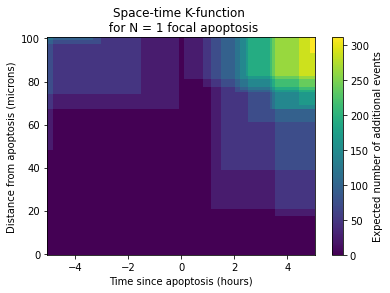

In [16]:
pc = plt.pcolormesh(delta_, h_, K_st, )
plt.colorbar(label = 'Expected number of additional events',)
plt.xlabel('Time since apoptosis (hours)')
plt.ylabel('Distance from apoptosis (microns)')
plt.title('Space-time K-function \n for N = 1 focal apoptosis')

## Temporal indistinguishability hypothesis

Random permutations of different time points to see if the K-function patterns still hold.

In [14]:
df

,Cell ID,dij,Frame,x,y,tij,Focal ID
0,100,322.666667,238,683,1126,-14.000000,GV0796_Pos3_Scr_-9
1,92,287.000000,10,732,841,-29.200000,GV0796_Pos3_Scr_-9
2,94,353.666667,135,68,1373,-20.866667,GV0796_Pos3_Scr_-9
3,95,288.000000,17,97,1218,-28.733333,GV0796_Pos3_Scr_-9
4,97,60.333333,223,78,162,-15.000000,GV0796_Pos3_Scr_-9
...,...,...,...,...,...,...,...
742,3621,262.000000,892,151,1149,29.600000,GV0796_Pos3_Scr_-9
743,4583,125.666667,879,46,707,28.733333,GV0796_Pos3_Scr_-9
744,4657,243.666667,963,899,132,34.333333,GV0796_Pos3_Scr_-9
745,4736,60.666667,976,183,184,35.200000,GV0796_Pos3_Scr_-9


The cell below mixes the order of the time points of the events for N different permutations, naming the new shuffled time points t<sub>pi</sub> and the indices of the permutations as tau.

In [17]:
### define the number of permutations to make
N = 1000
for tau in tqdm(range(N)):
    df[f'tpi τ = {tau}'] = df['tij'].sample(frac=1).reset_index(drop = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

<ipython-input-17-b49379d3ea8c>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'tpi τ = {tau}'] = df['tij'].sample(frac=1).reset_index(drop = True)


In [18]:
df

,Cell ID,dij,Frame,x,y,tij,Focal ID,tpi τ = 0,tpi τ = 1,tpi τ = 2,...,tpi τ = 990,tpi τ = 991,tpi τ = 992,tpi τ = 993,tpi τ = 994,tpi τ = 995,tpi τ = 996,tpi τ = 997,tpi τ = 998,tpi τ = 999
0,100,322.666667,238,683,1126,-14.000000,GV0796_Pos3_Scr_-9,3.666667,15.866667,22.000000,...,5.133333,23.800000,-3.066667,28.666667,9.533333,-2.333333,-14.000000,-4.533333,5.466667,-2.600000
1,92,287.000000,10,732,841,-29.200000,GV0796_Pos3_Scr_-9,20.866667,22.333333,16.400000,...,-3.733333,-28.733333,36.333333,28.466667,26.600000,1.466667,2.066667,8.066667,21.133333,29.600000
2,94,353.666667,135,68,1373,-20.866667,GV0796_Pos3_Scr_-9,-17.133333,15.466667,20.333333,...,-4.533333,34.866667,3.600000,-11.066667,19.466667,-13.533333,17.333333,-11.400000,13.533333,-25.333333
3,95,288.000000,17,97,1218,-28.733333,GV0796_Pos3_Scr_-9,26.800000,18.933333,-8.866667,...,25.466667,21.800000,-2.600000,3.066667,-3.066667,23.000000,22.400000,18.133333,15.066667,11.666667
4,97,60.333333,223,78,162,-15.000000,GV0796_Pos3_Scr_-9,14.533333,15.200000,-22.466667,...,9.133333,4.666667,9.133333,18.066667,33.066667,18.933333,17.466667,23.866667,36.666667,19.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,3621,262.000000,892,151,1149,29.600000,GV0796_Pos3_Scr_-9,-0.400000,23.733333,11.200000,...,21.133333,-25.866667,-1.000000,-4.400000,8.066667,9.200000,20.333333,20.533333,-12.066667,-18.533333
743,4583,125.666667,879,46,707,28.733333,GV0796_Pos3_Scr_-9,-5.666667,2.400000,-2.333333,...,-28.200000,7.133333,-20.733333,16.266667,35.733333,4.866667,24.733333,20.133333,-9.933333,-5.533333
744,4657,243.666667,963,899,132,34.333333,GV0796_Pos3_Scr_-9,13.200000,19.266667,-15.800000,...,20.866667,35.733333,15.466667,34.266667,22.333333,18.533333,20.133333,-11.333333,16.266667,-2.666667
745,4736,60.666667,976,183,184,35.200000,GV0796_Pos3_Scr_-9,20.133333,8.866667,13.800000,...,6.000000,34.133333,-1.600000,18.933333,-10.866667,14.800000,17.400000,9.133333,-22.600000,4.866667


In [19]:
def K_st_tau_func(h_, delta_, n, lambda_st, df, tau):
    K_st_tau = np.zeros((len(h_), len(delta_)))
    for i, h in enumerate(h_):
        for j, delta in (enumerate(delta_)):#, total = len(delta_), desc = 'Iterating over space-time'):
            ### if delta is negative, then needs to be greater than or less than zero
            if delta < 0:
                K_st_tau[i, j] = (1/(n * lambda_st)) * len(df[((df[f'tpi τ = {tau}']) <= 0) & ((df['tij']) >= (delta)) & (df['dij'] <= h)])
            ### if delta is positive, then has to be greater than zero less than delta
            else: 
                K_st_tau[i, j] = (1/(n * lambda_st)) * len(df[((df[f'tpi τ = {tau}']) >= 0) & ((df['tij']) <= (delta)) & (df['dij'] <= h)])

    return K_st_tau

Now calculating the space-time K-function for each permutation of time points

In [ ]:
K_st_tau = {}
for tau in tqdm(range(N), desc = 'Progress through tau'):
#     if tau in K_st_tau.keys():
#         continue
    K_st_tau[tau] = K_st_tau_func(h_, delta_, n, lambda_st, df, tau)

Checking to see if any two of the randomly time-indices-switched K-function arrays are identical (they should not be)

In [ ]:
def arrays_equal(a, b):
    if a.shape != b.shape:
        return False
    for ai, bi in zip(a.flat, b.flat):
        if ai != bi:
            return False
    return True

In [ ]:
import itertools
for a, b in tqdm(itertools.combinations(K_st_tau, 2), total = 499500):
    array1 = K_st_tau[a]
    array2 = K_st_tau[b]
    if arrays_equal(array1, array2) == True:
        print(a, b, 'are equal')

Saving out space-time K-function permutations

In [ ]:
import pickle
with open('K_st_tau_1000_N=1.pkl', 'wb') as f:
    pickle.dump(K_st_tau, f)

## Random labelling test

For the observed sample space-time K-function (K_st), under temporal indistinguishability hypothesis each observed value should be a typical sample from the list of values of the simulated random relabelings (K_st_tau). 
If we let M<sup>0</sup><sub>+</sub> denote the number of simulated random relabellings where
![original image](https://cdn.mathpix.com/snip/images/Wvkoq-491AhCE2m_G6zGw_L_3ED-5hRLSt7cNqDAC5M.original.fullsize.png)

then the probability of obtaining a value as large as the observed K-function value under this hypothesis is estimated by the space-time clustering p-value

![original image](https://cdn.mathpix.com/snip/images/526PhmFLMC_EuYZD2w1DfvWRy6jzb4JdlYYX_LGj0II.original.fullsize.png)

Similarly, if we let M0_minus denote the number of simulated random relabelling with 

![original image](https://cdn.mathpix.com/snip/images/ggXq7evPggixcgZ_Fi-46YcEWPo77kqt_-dkqGqwgqw.original.fullsize.png)

then the estimated probaility of obtaining a value as small as the original observed K-function under this hypothesis is given by the space-time dispersion p-value

![original image](https://cdn.mathpix.com/snip/images/FC8MktUTmWsfNpj8lo4j4eewvhiOyZhsaxH5egDg6ME.original.fullsize.png)

In [ ]:
N = 1000#len(K_st_tau)
P_st_clust = np.zeros(K_st.shape)
P_st_disp = np.zeros(K_st.shape)

for i, h in enumerate(tqdm(h_, total = len(h_))):
    for j, delta in enumerate(delta_):
        M0_plus = len([tau for tau in K_st_tau if K_st_tau[tau][i,j] >= K_st[i,j]])
        P_st_clust[i,j] = (M0_plus + 1)/(N+1)
        M0_minus = len([tau for tau in K_st_tau if K_st_tau[tau][i,j] <= K_st[i,j]])
        P_st_disp[i,j] = (M0_minus + 1)/(N+1)
    

Text(0.5, 1.0, 'Space-time clustering p-value contour map \n for N = 1 focal apoptosis')

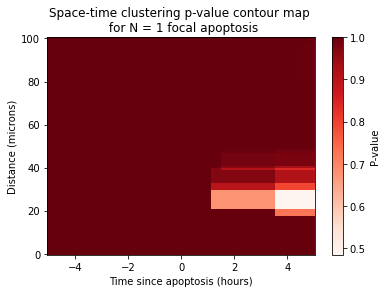

In [231]:
pc = plt.pcolormesh(delta_, h_, P_st_clust, cmap = 'Reds', )
plt.colorbar(label = 'P-value',)
plt.xlabel('Time since apoptosis (hours)')
plt.ylabel('Distance (microns)')
plt.title('Space-time clustering p-value contour map \n for N = 1 focal apoptosis')

Text(0.5, 1.0, 'Space-time dispersion p-value contour map \n for N = 1 focal apoptosis')

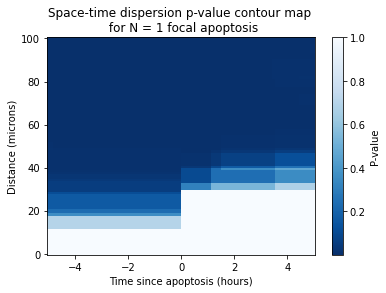

In [235]:
pc = plt.pcolormesh(delta_, h_, P_st_disp, cmap = 'Blues_r', )
plt.colorbar(label = 'P-value',)
plt.xlabel('Time since apoptosis (hours)')
plt.ylabel('Distance (microns)')
plt.title('Space-time dispersion p-value contour map \n for N = 1 focal apoptosis')

Cropped dispersion p-value plot showing a more accurate range of values for the furthest distances ie. d = 80-100 microns, across all time.

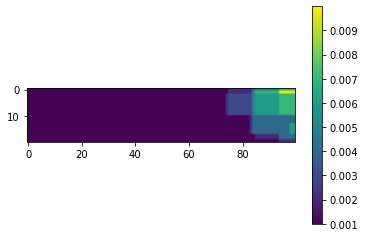

In [219]:
plt.imshow(P_st_disp[80:100,:])
plt.colorbar()

These plots seem to suggest no strong clustering but there is evidence for dispersion beyond the immediate local neighbourhood across all time. The dispersion plot indicates that there might be significantly less instances of division events occuring in neighbourhoods further away than would be detected under the temporal indistinguishability hypothesis. Not going to dwell too long on the conclusion of this analysis as it is only N=1, instead I need to scale up to all central focal events.

# Repeating analysis but over cumulative K-function measure...

Will surely need to generate new K-function tau values, ie. randomly swap the time indices of all new events found in cumulative measure. This could take ages. 

But how do I cumulatively measure a K-function? Assume all central focal events are the same single event? But then I have repeat measures of division events occurring... But the relevant distances to each focal event for each division event will be different, so not strictly a repeat measurement.

In [21]:
file_list = glob.glob('/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/scr_apop_wt_div_xyt/1600.1600/*')
file_list = [file for file in file_list if 'events' in file]
len(file_list)

1839

In [22]:
### loading all division localisations regardless of whether or not the scan leaves the FOV etc. (still cropping edge effects and loading all info)
df = load_radial_df(file_list, crop_amount = 20, streamline = False)# R = 100, crop_amount = True, streamline = False, strict_filtering = True)

  0%|          | 0/1839 [00:00<?, ?it/s]

/home/nathan/analysis/cell-comp-analysis/radial_analysis/dataio.py:90: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
/home/nathan/analysis/cell-comp-analysis/radial_analysis/dataio.py:91: FutureWarning: The default value of regex will change from True to False in a future version.
  df['y'] = df['y'].str.replace('[()]', '')


Number of focal cells included in cumulative scan: 1839


In [23]:
### renaming columns to fit with nomenclature of K-function
df = df.rename(columns={'Distance from apoptosis': 'dij', 'Time since apoptosis': 'tij'})

In [24]:
df

,Cell ID,dij,Frame,x,y,tij,Focal ID
0,709,178.333333,1072,856,1327,5.133333,GV0819_Pos3_Scr_-1735
1,856,186.333333,976,746,1416,-1.266667,GV0819_Pos3_Scr_-1735
2,966,30.333333,1059,552,816,4.266667,GV0819_Pos3_Scr_-1735
3,979,280.666667,999,256,107,0.266667,GV0819_Pos3_Scr_-1735
4,1039,241.333333,1023,1052,1405,1.866667,GV0819_Pos3_Scr_-1735
...,...,...,...,...,...,...,...
398506,1686,183.666667,1159,832,842,0.933333,GV0819_Pos2_Scr_-490
398507,1687,172.000000,1149,803,885,0.266667,GV0819_Pos2_Scr_-490
398508,1731,318.333333,941,155,25,-13.600000,GV0819_Pos2_Scr_-490
398509,1765,194.333333,1112,871,1037,-2.200000,GV0819_Pos2_Scr_-490


In [25]:
n1 = len(df['Cell ID'])#len(set(df['Cell ID']))
print('Total number of division events, n = ', n1)
n2 = len(set(df['Focal ID'])) #len(file_list)
print('Total number of focal apoptotic events, n = ', n2)

Total number of division events, n =  398511
Total number of focal apoptotic events, n =  1838


In [26]:
T = max(df['tij']) - min(df['tij'])
print('Default time interval, T = ', T)

Default time interval, T =  106.6


In [27]:
x_range = max(df['x']) - min(df['x'])
y_range = max(df['y']) - min(df['y'])
### convert from pixels to micrometres (/3)
a = (x_range/3)*(y_range/3)
print('Total area (FOV) in micrometres, a(R) =', round(a), 'microns squared')

Total area (FOV) in micrometres, a(R) = 201067 microns squared


In [28]:
n = n1
lambda_st = n/(a*T)
print('Space-time intensity parameter, lambda_st = ', lambda_st)
lambda_1 = n1/(a*T)
print('Space-time intensity parameter for division events, lambda_1 = ', lambda_1)
lambda_2 = n2/(a*T)
print('Space-time intensity parameter for apoptotic events, lambda_2 = ', lambda_2)

Space-time intensity parameter, lambda_st =  0.01859272435690078
Space-time intensity parameter for division events, lambda_1 =  0.01859272435690078
Space-time intensity parameter for apoptotic events, lambda_2 =  8.575278315525453e-05


In [29]:
delta_ = np.linspace(-5,5, 100)
h_ = np.linspace(0,100, 100)

In [30]:
n

398511

In [31]:
K_st = K_st_func(h_, delta_, n, lambda_st, df)

Iterating over space-time:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Space-time K-function \n for N = 1838 focal apoptosis')

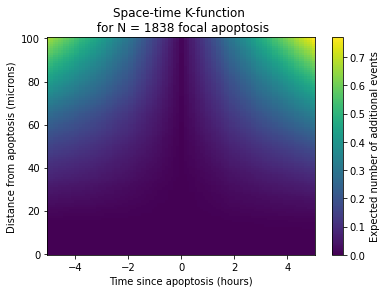

In [32]:
pc = plt.pcolormesh(delta_, h_, K_st, )
plt.colorbar(label = 'Expected number of additional events',)
plt.xlabel('Time since apoptosis (hours)')
plt.ylabel('Distance from apoptosis (microns)')
plt.title(f'Space-time K-function \n for N = {n2} focal apoptosis')

Why is this plot symmetrical? Is it symmetrical? It only appears symmetrical around the zero values

Text(0.5, 1.0, 'Checking temporal symmetry of space-time K-function plot')

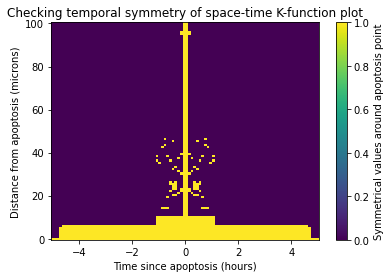

In [74]:
pc = plt.pcolormesh(delta_, h_, (np.fliplr(K_st) == K_st), )
plt.colorbar(label = 'Symmetrical values around apoptosis point',)
plt.xlabel('Time since apoptosis (hours)')
plt.ylabel('Distance from apoptosis (microns)')
plt.title(f'Checking temporal symmetry of space-time K-function plot')

The plot is only symmetrical around the zero values and looks this was as it is a cumulative measure of expected values around the origin of t = 0.

### Cumulative temporal indistinguishability test

Random permutations of different time points to see if the K-function patterns still hold.

In [33]:
df

,Cell ID,dij,Frame,x,y,tij,Focal ID
0,709,178.333333,1072,856,1327,5.133333,GV0819_Pos3_Scr_-1735
1,856,186.333333,976,746,1416,-1.266667,GV0819_Pos3_Scr_-1735
2,966,30.333333,1059,552,816,4.266667,GV0819_Pos3_Scr_-1735
3,979,280.666667,999,256,107,0.266667,GV0819_Pos3_Scr_-1735
4,1039,241.333333,1023,1052,1405,1.866667,GV0819_Pos3_Scr_-1735
...,...,...,...,...,...,...,...
398506,1686,183.666667,1159,832,842,0.933333,GV0819_Pos2_Scr_-490
398507,1687,172.000000,1149,803,885,0.266667,GV0819_Pos2_Scr_-490
398508,1731,318.333333,941,155,25,-13.600000,GV0819_Pos2_Scr_-490
398509,1765,194.333333,1112,871,1037,-2.200000,GV0819_Pos2_Scr_-490


In [34]:
### define the number of permutations to make
N = 1000
for tau in tqdm(range(N)):
    df[f'tpi τ = {tau}'] = df['tij'].sample(frac=1).reset_index(drop = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

<ipython-input-34-b49379d3ea8c>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'tpi τ = {tau}'] = df['tij'].sample(frac=1).reset_index(drop = True)


In [35]:
df

,Cell ID,dij,Frame,x,y,tij,Focal ID,tpi τ = 0,tpi τ = 1,tpi τ = 2,...,tpi τ = 990,tpi τ = 991,tpi τ = 992,tpi τ = 993,tpi τ = 994,tpi τ = 995,tpi τ = 996,tpi τ = 997,tpi τ = 998,tpi τ = 999
0,709,178.333333,1072,856,1327,5.133333,GV0819_Pos3_Scr_-1735,12.533333,20.933333,1.133333,...,13.533333,9.266667,3.533333,41.400000,3.600000,21.066667,43.666667,18.400000,-40.933333,6.000000
1,856,186.333333,976,746,1416,-1.266667,GV0819_Pos3_Scr_-1735,-25.266667,15.466667,4.866667,...,-8.000000,-2.933333,-12.000000,-7.800000,-3.866667,-6.133333,4.733333,3.066667,-6.400000,-24.666667
2,966,30.333333,1059,552,816,4.266667,GV0819_Pos3_Scr_-1735,0.200000,16.733333,-15.666667,...,-31.200000,-9.666667,31.666667,11.466667,12.400000,-11.133333,5.866667,0.533333,-20.466667,4.933333
3,979,280.666667,999,256,107,0.266667,GV0819_Pos3_Scr_-1735,15.600000,-14.200000,-10.066667,...,17.466667,32.800000,24.533333,-42.200000,16.733333,4.800000,36.933333,-1.933333,-7.933333,-19.800000
4,1039,241.333333,1023,1052,1405,1.866667,GV0819_Pos3_Scr_-1735,25.200000,1.066667,3.733333,...,-45.000000,3.933333,7.133333,-9.533333,-25.000000,51.133333,-21.600000,-20.133333,12.200000,32.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398506,1686,183.666667,1159,832,842,0.933333,GV0819_Pos2_Scr_-490,7.333333,33.466667,6.666667,...,-16.200000,1.400000,-2.600000,27.866667,-10.333333,-8.533333,18.000000,22.466667,5.666667,19.933333
398507,1687,172.000000,1149,803,885,0.266667,GV0819_Pos2_Scr_-490,13.400000,-6.200000,-2.333333,...,29.933333,43.600000,10.933333,12.000000,-22.866667,-4.733333,45.666667,14.333333,22.866667,29.933333
398508,1731,318.333333,941,155,25,-13.600000,GV0819_Pos2_Scr_-490,34.666667,0.800000,44.333333,...,14.400000,11.200000,-5.733333,-10.333333,-13.600000,1.266667,35.733333,33.733333,23.133333,-5.066667
398509,1765,194.333333,1112,871,1037,-2.200000,GV0819_Pos2_Scr_-490,-19.666667,-18.400000,13.400000,...,32.733333,2.533333,12.000000,1.400000,-7.666667,46.600000,32.466667,-24.733333,-29.866667,-18.066667


Only iterating over 100 different permuations as I've parallelised the calculation over different notebooks. Still looks like it will take over 12 hours!

In [78]:
K_st_tau = {}
for tau in tqdm(range(100), desc = 'Progress through tau'):
    K_st_tau[tau] = K_st_tau_func(h_, delta_, n, lambda_st, df, tau)

Progress through tau:   0%|          | 0/100 [00:00<?, ?it/s]

In [41]:
import pickle

In [79]:
with open('K_st_tau_0100.pkl', 'wb') as f:
    pickle.dump(K_st_tau, f)

Loading previously calculated tau permutations from parallelised processes

In [36]:
from natsort import natsorted

In [39]:
natsorted(glob.glob('K_st_tau_(*).pkl'))

['K_st_tau_(0,100).pkl',
 'K_st_tau_(100, 200).pkl',
 'K_st_tau_(200, 300).pkl',
 'K_st_tau_(300, 400).pkl',
 'K_st_tau_(400, 500).pkl',
 'K_st_tau_(500, 600).pkl',
 'K_st_tau_(600, 700).pkl',
 'K_st_tau_(700, 800).pkl',
 'K_st_tau_(800, 900).pkl',
 'K_st_tau_(900, 1000).pkl']

In [43]:
K_st_tau = {}
for fn in natsorted(glob.glob('K_st_tau_*.pkl')):

    with open(f'{fn}', 'rb') as handle:
        b = pickle.load(handle)
        
    for i in b:
        K_st_tau[i] = b[i]

In [44]:
len(K_st_tau)

1000

Checking to see if any two of the randomly time-indices-switched K-function arrays are identical (they should not be)

In [45]:
def arrays_equal(a, b):
    if a.shape != b.shape:
        return False
    for ai, bi in zip(a.flat, b.flat):
        if ai != bi:
            return False
    return True

In [46]:
import itertools
for a, b in tqdm(itertools.combinations(K_st_tau, 2), total = 499500):
    array1 = K_st_tau[a]
    array2 = K_st_tau[b]
    if arrays_equal(array1, array2) == True:
        print(a, b, 'are equal')

  0%|          | 0/499500 [00:00<?, ?it/s]

In [47]:
N = len(K_st_tau)
P_st_clust = np.zeros(K_st.shape)
P_st_disp = np.zeros(K_st.shape)

for i, h in enumerate(tqdm(h_, total = len(h_))):
    for j, delta in enumerate(delta_):
        M0_plus = len([tau for tau in K_st_tau if K_st_tau[tau][i,j] >= K_st[i,j]])
        P_st_clust[i,j] = (M0_plus + 1)/(N+1)
        M0_minus = len([tau for tau in K_st_tau if K_st_tau[tau][i,j] <= K_st[i,j]])
        P_st_disp[i,j] = (M0_minus + 1)/(N+1)
    

  0%|          | 0/100 [00:00<?, ?it/s]

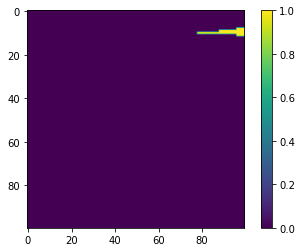

In [58]:
plt.imshow(P_st_clust < 0.05)
plt.colorbar()

In [55]:
for i, j in enumerate(delta_):
    print(i, j)

0 -5.0
1 -4.898989898989899
2 -4.797979797979798
3 -4.696969696969697
4 -4.595959595959596
5 -4.494949494949495
6 -4.393939393939394
7 -4.292929292929293
8 -4.191919191919192
9 -4.090909090909091
10 -3.9898989898989896
11 -3.888888888888889
12 -3.787878787878788
13 -3.686868686868687
14 -3.5858585858585856
15 -3.484848484848485
16 -3.383838383838384
17 -3.282828282828283
18 -3.1818181818181817
19 -3.080808080808081
20 -2.9797979797979797
21 -2.878787878787879
22 -2.7777777777777777
23 -2.676767676767677
24 -2.5757575757575757
25 -2.474747474747475
26 -2.3737373737373737
27 -2.272727272727273
28 -2.1717171717171717
29 -2.070707070707071
30 -1.9696969696969697
31 -1.868686868686869
32 -1.7676767676767677
33 -1.6666666666666665
34 -1.5656565656565657
35 -1.4646464646464645
36 -1.3636363636363638
37 -1.2626262626262625
38 -1.1616161616161618
39 -1.0606060606060606
40 -0.9595959595959593
41 -0.858585858585859
42 -0.7575757575757578
43 -0.6565656565656566
44 -0.5555555555555554
45 -0.4545454

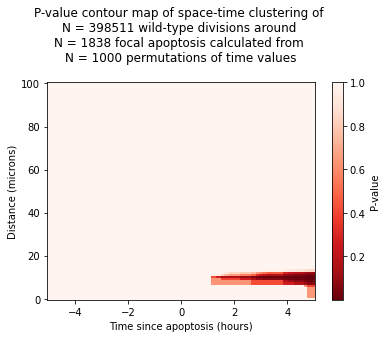

In [61]:
pc = plt.pcolormesh(delta_, h_, P_st_clust, cmap = 'Reds_r', )
plt.colorbar(label = 'P-value',)
plt.xlabel('Time since apoptosis (hours)')
plt.ylabel('Distance (microns)')
plt.title(f'P-value contour map of space-time clustering of \nN = {n1} wild-type divisions around \nN = {n2} focal apoptosis calculated from \nN = {N} permutations of time values\n')
plt.savefig('p-value-division-clustering_100um_10hrs.pdf', bbox_inches = 'tight')

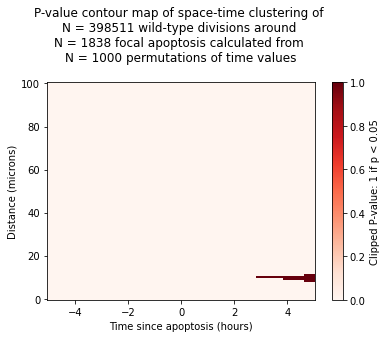

In [90]:
pc = plt.pcolormesh(delta_, h_, P_st_clust < 0.05, cmap = 'Reds', )
plt.colorbar(label = 'Clipped P-value: 1 if p < 0.05',)
plt.xlabel('Time since apoptosis (hours)')
plt.ylabel('Distance (microns)')
plt.title(f'P-value contour map of space-time clustering of \nN = {n1} wild-type divisions around \nN = {n2} focal apoptosis calculated from \nN = {N} permutations of time values\n')
plt.savefig('p-value-division-clustering_100um_10hrs_clipped_p-0.05.pdf', bbox_inches = 'tight')

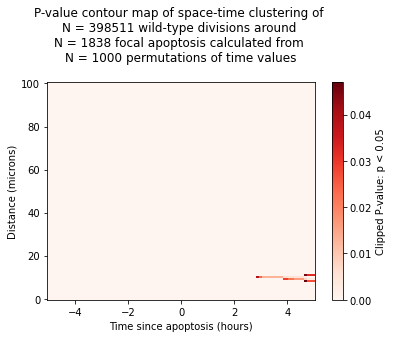

In [108]:
clip_clust = np.zeros((100,100))
clip_clust[P_st_clust <0.05] = P_st_clust[P_st_clust <0.05]
pc = plt.pcolormesh(delta_, h_, clip_clust, cmap = 'Reds', )
plt.colorbar(label = 'Clipped P-value: p < 0.05',)
plt.xlabel('Time since apoptosis (hours)')
plt.ylabel('Distance (microns)')
plt.title(f'P-value contour map of space-time clustering of \nN = {n1} wild-type divisions around \nN = {n2} focal apoptosis calculated from \nN = {N} permutations of time values\n')
plt.savefig('p-value-division-clustering_100um_10hrs_clipped_p-0.05_fullrange.pdf', bbox_inches = 'tight')

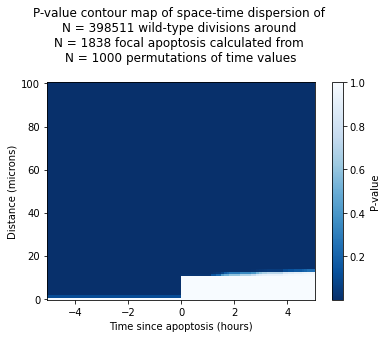

In [105]:
pc = plt.pcolormesh(delta_, h_, P_st_disp, cmap = 'Blues_r', )
plt.colorbar(label = 'P-value',)
plt.xlabel('Time since apoptosis (hours)')
plt.ylabel('Distance (microns)')
plt.title(f'P-value contour map of space-time dispersion of \nN = {n1} wild-type divisions around \nN = {n2} focal apoptosis calculated from \nN = {N} permutations of time values\n')
plt.savefig('p-value-division-dispersion_100um_10hrs.pdf', bbox_inches = 'tight')

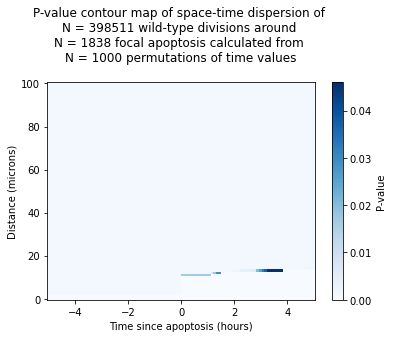

In [107]:
clip_disp = np.zeros((100,100))
clip_disp[P_st_disp <0.05] = P_st_disp[P_st_disp <0.05]
pc = plt.pcolormesh(delta_, h_, clip_disp, cmap = 'Blues', )
plt.colorbar(label = 'P-value',)
plt.xlabel('Time since apoptosis (hours)')
plt.ylabel('Distance (microns)')
plt.title(f'P-value contour map of space-time dispersion of \nN = {n1} wild-type divisions around \nN = {n2} focal apoptosis calculated from \nN = {N} permutations of time values\n')
plt.savefig('p-value-division-dispersion_100um_10hrs_clipped_p-0.05_fullrange.pdf', bbox_inches = 'tight')

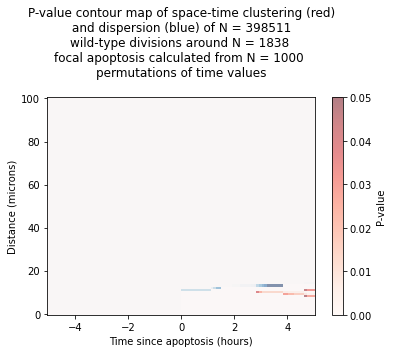

In [163]:
clip_disp = np.zeros((100,100))
clip_disp[P_st_disp <0.05] = P_st_disp[P_st_disp <0.05]
pc = plt.pcolormesh(delta_, h_, clip_disp, cmap = 'Blues',)
plt.pcolormesh(delta_, h_, clip_clust, cmap = 'Reds',alpha = 0.5)
plt.colorbar(label = 'P-value', cmap = 'Grays')
plt.clim(0,0.05)
plt.xlabel('Time since apoptosis (hours)')
plt.ylabel('Distance (microns)')
plt.title(f'P-value contour map of space-time clustering (red)\n and dispersion (blue) of N = {n1} \nwild-type divisions around N = {n2} \nfocal apoptosis calculated from N = {N} \npermutations of time values\n')
plt.savefig('p-value-division-cluster-dispersion-overlay_100um_10hrs_clipped_p-0.05_fullrange.pdf', bbox_inches = 'tight')